# Project3: Women Trafficking in China


In [1]:
import pandas as pd
from plotnine import *

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_excel('WVS_Wave_7_China_Excel_v2.0.xlsx')

/Users/angeline_jcq/.pyenv/versions/3.9.7/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default


In [12]:
df_selected = df[['N_REGION_WVS: Region country specific', 
                  'Q28: Pre-school child suffers with working mother',
                  'Q29: Men make better political leaders than women do',
                  'Q30: University is more important for a boy than for a girl',
                  'Q31: Men make better business executives than women do',
                  'Q32: Being a housewife just as fulfilling',
                  'Q33: Jobs scarce: Men should have more right to a job than women',
                  'Q35: Problem if women have more income than husband',
                  'Q275R: Highest educational level: Respondent (recoded into 3 groups)',
                  'Q262: Age',
                  'Q279: Employment status',
                  'Q288: Scale of incomes']]

In [13]:
df_selected = df_selected.rename(columns={"N_REGION_WVS: Region country specific": "province", 
                   "Q28: Pre-school child suffers with working mother": "n_mother",
                   "Q29: Men make better political leaders than women do": "n_leader",
                   "Q30: University is more important for a boy than for a girl": "n_education",
                   "Q31: Men make better business executives than women do":"n_executive",
                   "Q32: Being a housewife just as fulfilling":"p_housewife",
                   "Q33: Jobs scarce: Men should have more right to a job than women":"n_job",
                   "Q35: Problem if women have more income than husband":"n_money",
                   "Q275R: Highest educational level: Respondent (recoded into 3 groups)":"education",
                   "Q262: Age":"age",
                   "Q279: Employment status":"employment",
                   "Q288: Scale of incomes":"income"}
         )

In [14]:
df_selected['province_name'] = df_selected.province.replace(
    [156101.0,156102.0,156103.0,156104.0,156105.0,
     156106.0,156107.0,156108.0,156109.0,156110.0,
     156111.0,156112.0,156114.0,156115.0,156116.0,
     156117.0,156118.0,156119.0,156121.0,156122.0,
     156123.0,156124.0,156125.0,156126.0,156127.0,
     156128.0,156129.0,156133.0,156134.0],
    ["Anhui","Beijing","Chongqing","Fujian","Guangdong",
     "Gansu","Guangxi","Guizhou","Henan","Hubei",
     "Hebei","Hainan","Heilongjiang","Hunan","Jilin",
     "Jiangsu","Jiangxi","Liaoning","Neimenggu","Ningxia",
     "Qinghai","Sichuan","Shandong","Shanghai","Shaanxi",
     "Shanxi","Tianjin","Yunnan","Zhejiang"])

In [21]:
df_selected = df_selected.replace([-1.0,-2.0],None)

In [24]:
df_selected

,province,n_mother,n_leader,n_education,n_executive,p_housewife,n_job,n_money,education,age,employment,income,province_name
0,156102.0,2.0,2.0,3.0,3.0,3.0,2.0,3.0,-2.0,38.0,-2.0,4.0,Beijing
1,156102.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,1.0,52.0,1.0,3.0,Beijing
2,156102.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,69.0,4.0,6.0,Beijing
3,156102.0,2.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,48.0,4.0,5.0,Beijing
4,156102.0,3.0,2.0,3.0,3.0,2.0,4.0,2.0,3.0,70.0,4.0,4.0,Beijing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,156122.0,3.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,46.0,5.0,2.0,Ningxia
3032,156122.0,1.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0,35.0,5.0,2.0,Ningxia
3033,156122.0,2.0,2.0,3.0,3.0,1.0,4.0,4.0,2.0,24.0,1.0,6.0,Ningxia
3034,156122.0,1.0,2.0,3.0,3.0,2.0,2.0,4.0,2.0,46.0,1.0,3.0,Ningxia


In [26]:
df_selected['gender_score']= df_selected.n_mother + df_selected.n_leader + df_selected.n_education \
                    + df_selected.n_executive - df_selected.p_housewife + (df_selected.n_job/5*4) + (df_selected.n_money/5*4)

In [27]:
means = df_selected.groupby(by='province_name') \
        .agg(gender_score = pd.NamedAgg(column='gender_score',aggfunc = 'mean')).reset_index()

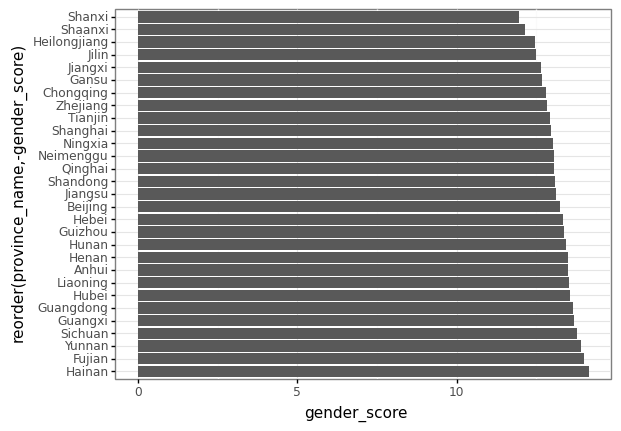

<ggplot: (300271821)>

In [28]:
(
    ggplot(means)
    + aes(x='reorder(province_name,-gender_score)', y='gender_score')
    + geom_bar(stat='identity')
    + theme_bw()
    + coord_flip()
)